<a href="https://colab.research.google.com/github/Silverz21/Ajuste-de-Parametros/blob/main/tarea_rn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
warnings.filterwarnings('ignore') 

In [4]:
path = "/content/drive/MyDrive/creditcard.csv"
df = pd.read_csv(path)
df.dropna(inplace=True)
display(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77332,57002,0.958079,-0.370366,1.258194,0.730481,-0.436944,1.544908,-0.932519,0.638980,0.865370,...,0.055591,0.496503,0.190713,-0.595555,-0.101279,0.424053,0.088563,0.017342,15.97,0.0
77333,57003,-1.565835,0.537575,3.284121,3.229021,-0.917761,2.016339,-1.157749,1.086392,0.234172,...,0.125678,1.072830,-0.229837,0.094444,0.215087,0.544487,0.271867,-0.089124,25.69,0.0
77334,57005,-0.710264,-0.095320,2.899716,0.718612,-0.501955,0.968641,-0.007123,0.308006,1.383339,...,0.069589,0.711129,-0.038570,0.088990,-0.282553,-0.448201,0.054450,-0.051693,65.00,0.0
77335,57005,0.875729,-0.658494,-0.798643,-0.889801,-0.205406,-1.093946,0.743501,-0.381269,0.405087,...,0.192299,0.161282,-0.451218,0.060376,0.885705,-0.477421,-0.036297,0.035704,235.53,0.0


In [5]:
# Verificar la distribución de las clases
a, b = df['Class'].value_counts()
print("Fraudes en la base de datos:", b)
print("Transacciones Validas:",a)
print("Porcentaje de Fraudes:",round(b/len(df) * 100, 3),"%")

Fraudes en la base de datos: 188
Transacciones Validas: 77149
Porcentaje de Fraudes: 0.243 %


<Axes: ylabel=' '>

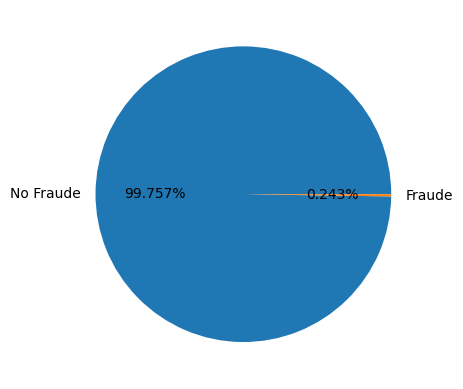

In [6]:
# Graficar la distribución de las clases
data = df.copy()
data[" "] = np.where(df["Class"] == 1 ,  "Fraude", "No Fraude")
data[" "].value_counts().plot(kind="pie", autopct='%.3f%%')

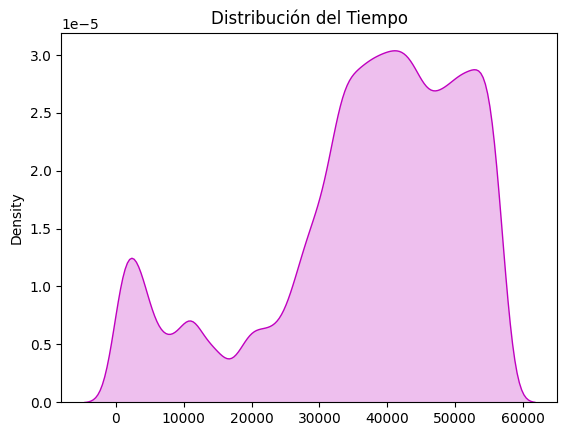

In [9]:
time_value = df['Time'].values # values

sns.distplot(time_value, hist=False, color="m", kde_kws={"shade": True}).set_title('Distribución del Tiempo')

plt.show()

In [11]:
print("Promedio de Gastos (Fraude): " + str(df[df["Class"] == 1]["Amount"].mean()))
print("Promedio de Gastos (Transacción Valida): " + str(df[df["Class"] == 0]["Amount"].mean()))

Promedio de Gastos (Fraude): 94.29249999999999
Promedio de Gastos (Transacción Valida): 97.6258674772194


In [12]:
X = df.drop(['Class', "Time", "Amount"], axis=1)
y = df['Class']

In [13]:
X_ent, X_pr, y_ent, y_pr = train_test_split(X, y, train_size=0.85)

In [47]:
model = Sequential()
model.add(Dense(32, input_dim=X_ent.shape[1], activation='tanh'))
model.add(Dense(8, activation='tanh')) 
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_ent, y_ent, epochs=10, batch_size=64)

Epoch 1/10
1028/1028 [==============================] - 2s 2ms/step - loss: 0.0638 - accuracy: 0.9828
Epoch 2/10
1028/1028 [==============================] - 2s 2ms/step - loss: 0.0054 - accuracy: 0.9990
Epoch 3/10
1028/1028 [==============================] - 2s 2ms/step - loss: 0.0039 - accuracy: 0.9991
Epoch 4/10
1028/1028 [==============================] - 2s 2ms/step - loss: 0.0033 - accuracy: 0.9993
Epoch 5/10
1028/1028 [==============================] - 2s 2ms/step - loss: 0.0030 - accuracy: 0.9993
Epoch 6/10
1028/1028 [==============================] - 2s 2ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 7/10
1028/1028 [==============================] - 2s 2ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 8/10
1028/1028 [==============================] - 2s 2ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 9/10
1028/1028 [==============================] - 2s 2ms/step - loss: 0.0023 - accuracy: 0.9994
Epoch 10/10
1028/1028 [==============================] - 2s 2ms/step - loss: 0.002

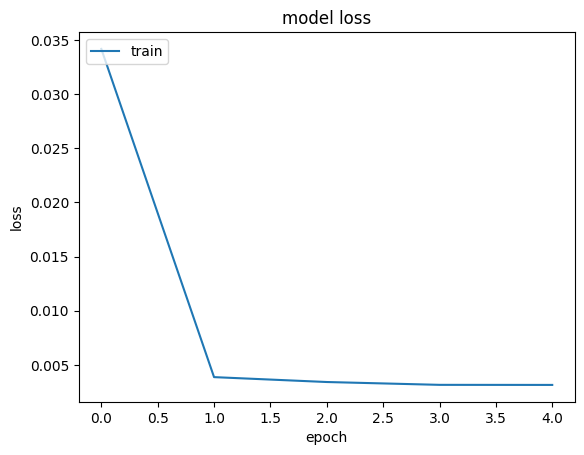

In [35]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
model.evaluate(X_ent, y_ent)

2055/2055 [==============================] - 4s 2ms/step - loss: 0.0022 - accuracy: 0.9993


[0.0021675569005310535, 0.9992697834968567]

In [42]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 16)                464       
                                                                 
 dense_56 (Dense)            (None, 8)                 136       
                                                                 
 dense_57 (Dense)            (None, 1)                 9         
                                                                 
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________
